In [1]:
import numpy as np
import numpy_groupies
import xarray as xr
import pandas as pd
import xrft
import gsw
from intake import open_catalog
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
dsh  = cat["eNATL60_BLBT02_SSH"].to_dask()
dsh

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 11688, x: 8354, y: 4729)
Coordinates:
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(240,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2010-01-19T00:30:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    nav_lat               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(240, 240, 480), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    TimeStamp:    24/03/2019 14:43:29 +0100
    description:  ocean T grid variables
    file_name:    eNATL60-BLBT02X_1h_20100101_20100125_gridT-2D_20100119-2010...
    ibegin:       0
    jbegin:       0
    name:         /scratch/tmp/5251284/eNATL60-BLBT02X_1h_20100101_20100125_g...
    ni:           8354
    nj:           10
    timeStamp:    2019-Mar-24 06:31:35 GMT
    title:        ocean T grid variables
    uuid:         80877374-74d2-468e-9fc6-d8cae8009094

In [3]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
dsg  = cat["eNATL60_grid"].to_dask().isel(t=0)
dsg

<xarray.Dataset>
Dimensions:       (x: 8354, y: 4729, z: 300)
Dimensions without coordinates: x, y, z
Data variables:
    e1f           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1t           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1u           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e1v           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2f           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2t           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2u           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e2v           (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    e3t_0         (z, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_1d        (z) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    e3u_0         (z, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3v_0         (z, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3w_0         (z, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3w_1d        (z) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ff            (y, x) float64 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    fmask         (z, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gdept_0       (z, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdept_1d      (z) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdepu         (z, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdepv         (z, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdepw_0       (z, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdepw_1d      (z) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    glamf         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamt         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamu         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    glamv         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphif         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphit         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphiu         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    gphiv         (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    isfdraft      (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    mbathy        (y, x) int16 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    misf          (y, x) int16 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    time_counter  float64 dask.array<chunksize=(), meta=np.ndarray>
    tmask         (z, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    tmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    umask         (z, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    vmask         (z, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmaskutil     (y, x) int8 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
Attributes:
    TimeStamp:  13/07/2018 22:32:53 +0200
    file_name:  mesh_mask.nc

In [4]:
maskT = dsg.tmask
lat = dsg.nav_lat.where(maskT.isel(z=0)!=0.)
lon = dsg.nav_lon.where(maskT.isel(z=0)!=0.)
ssh = dsh.sossheig.where(maskT.isel(z=0)!=0.)

midAy = np.array([1570,2340])
midAx = np.array([2730,3240])
GSy = np.array([1580,2360])
GSx = np.array([1190,1700])

In [5]:
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.scale(30)
# cluster
client = Client(cluster)
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.2623a437de444dbeb30c955116f8f69d Dashboard: /services/dask-gateway/clusters/prod.2623a437de444dbeb30c955116f8f69d/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: Matp

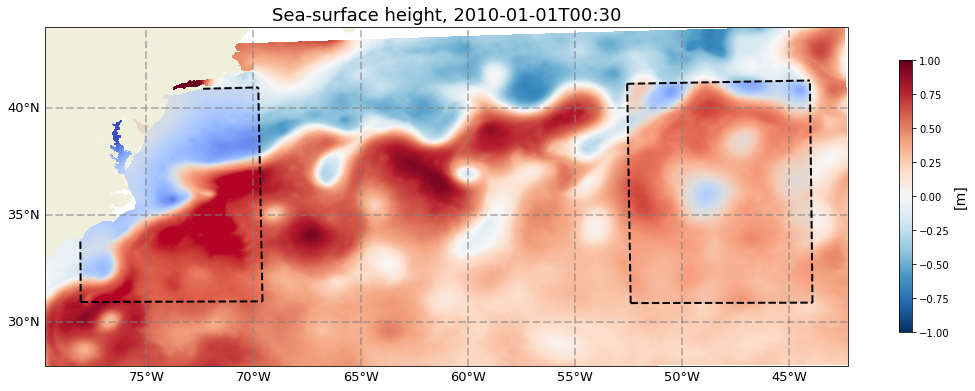

In [19]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())


im = ax.pcolor(lon.isel(y=slice(midAy[0]-200,midAy[1]+200),x=slice(GSx[0]-100,midAx[1]+100)), 
               lat.isel(y=slice(midAy[0]-200,midAy[1]+200),x=slice(GSx[0]-100,midAx[1]+100)), 
               ssh.sel(time_counter='2010-01-01T00:30', method='nearest'
                      )[0].isel(y=slice(midAy[0]-200,midAy[1]+200), 
                                x=slice(GSx[0]-100,midAx[1]+100)),
               cmap='RdBu_r', vmin=-1, vmax=1, rasterized=True, transform=ccrs.PlateCarree())
ax.pcolor(lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1])), 
          lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1])), 
          ssh.sel(time_counter='2010-01-01T00:30', method='nearest'
                 )[0].isel(y=slice(midAy[0],midAy[1]), x=slice(midAx[0],midAx[1])),
          cmap='coolwarm', vmin=-.8, vmax=.8, rasterized=True, transform=ccrs.PlateCarree())
ax.pcolor(lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1])), 
          lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1])), 
          ssh.sel(time_counter='2010-01-01T00:30', method='nearest'
                 )[0].isel(y=slice(GSy[0],GSy[1]), x=slice(GSx[0],GSx[1])),
          cmap='coolwarm', vmin=-.8, vmax=.8, rasterized=True, transform=ccrs.PlateCarree())


ax.plot([lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,0],
         lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,0]], 
        [lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,0],
         lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,0]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,0],
         lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,-1]], 
        [lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,0],
         lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,-1],
         lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,-1]], 
        [lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[0,-1],
         lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,0],
         lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,-1]], 
        [lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,0],
         lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))[-1,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())

ax.plot([lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,0],
         lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[:,0].min(skipna=True)], 
        [lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,0],
         lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[:,0].max(skipna=True)],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,0],
         lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,-1]], 
        [lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,0],
         lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,-1],
         lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,-1]], 
        [lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[0,-1],
         lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())
ax.plot([lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,:].min(skipna=True),
         lon.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,-1]], 
        [lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,:].min(skipna=True),
         lat.isel(y=slice(GSy[0],GSy[1]),x=slice(GSx[0],GSx[1]))[-1,-1]],
        'k', lw=2, ls='--', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.ylocator = mticker.FixedLocator([30,35,40,45,50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':13, 'color':'k'}
gl.ylabel_style = {'size':13, 'color':'k'}
ax.set_xlabel(r"Longitude", fontsize=16)
ax.set_ylabel(r"Latitude", fontsize=16)
ax.set_title(r"Sea-surface height, " + str(ssh.time_counter.sel(time_counter='2010-01-01T00:30', 
                                                                method='nearest').data
                                          )[2:18], 
             fontsize=18)
cbar = fig.colorbar(im, shrink=.5)
cbar.set_label(r"[m]", fontsize=14)

In [7]:
midAdx = gsw.distance(lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1])),
                      lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1]))
                     ).mean(skipna=True)
midAdy = gsw.distance(lon.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1])),
                      lat.isel(y=slice(midAy[0],midAy[1]),x=slice(midAx[0],midAx[1])),
                      axis=0).mean(skipna=True)
GSdx = gsw.distance(lon.isel(y=slice(GSy[0],GSy[1]),x=slice(midAx[0],midAx[1])),
                    lat.isel(y=slice(GSy[0],GSy[1]),x=slice(midAx[0],midAx[1]))
                   ).mean(skipna=True)
GSdy = gsw.distance(lon.isel(y=slice(GSy[0],GSy[1]),x=slice(midAx[0],midAx[1])),
                    lat.isel(y=slice(GSy[0],GSy[1]),x=slice(midAx[0],midAx[1])),
                    axis=0).mean(skipna=True)

In [8]:
DJFmidAh = ssh.sortby('time_counter').sel(time_counter=slice('2009-12-01T00:30',
                                                             '2010-02-28T23:30')
                                         ).isel(y=slice(midAy[0],midAy[1]),
                                                x=slice(midAx[0],midAx[1])
                                               )[::24].chunk({'time_counter':1})  # every 24-hourly data
JASmidAh = ssh.sortby('time_counter').sel(time_counter=slice('2010-07-01T00:30',
                                                             '2010-09-30T23:30')
                                         ).isel(y=slice(midAy[0],midAy[1]),
                                                x=slice(midAx[0],midAx[1])
                                               )[::24].chunk({'time_counter':1})
DJFGSh = ssh.sortby('time_counter').sel(time_counter=slice('2009-12-01T00:30',
                                                           '2010-02-28T23:30')
                                       ).isel(y=slice(GSy[0],GSy[1]),
                                              x=slice(GSx[0],GSx[1])
                                             )[::24].chunk({'time_counter':1})
JASGSh = ssh.sortby('time_counter').sel(time_counter=slice('2010-07-01T00:30',
                                                           '2010-09-30T23:30')
                                       ).isel(y=slice(GSy[0],GSy[1]),
                                              x=slice(GSx[0],GSx[1])
                                             )[::24].chunk({'time_counter':1})

DJFmidAh.coords['y'] = ('y',np.arange(0,len(DJFmidAh.y)*midAdy,midAdy))
DJFmidAh.coords['x'] = ('x',np.arange(0,len(DJFmidAh.x)*midAdx,midAdx))
JASmidAh.coords['y'] = ('y',np.arange(0,len(JASmidAh.y)*midAdy,midAdy))
JASmidAh.coords['x'] = ('x',np.arange(0,len(JASmidAh.x)*midAdx,midAdx))
DJFGSh.coords['y'] = ('y',np.arange(0,len(DJFGSh.y)*GSdy,GSdy))
DJFGSh.coords['x'] = ('x',np.arange(0,len(DJFGSh.x)*GSdx,GSdx))
JASGSh.coords['y'] = ('y',np.arange(0,len(JASGSh.y)*GSdy,GSdy))
JASGSh.coords['x'] = ('x',np.arange(0,len(JASGSh.x)*GSdx,GSdx))
JASGSh

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/note

<xarray.DataArray 'sossheig' (time_counter: 92, y: 780, x: 510)>
dask.array<rechunk-merge, shape=(92, 780, 510), dtype=float32, chunksize=(1, 240, 260), chunktype=numpy.ndarray>
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-07-01T00:30:00 ... 2010...
  * y              (y) float64 0.0 1.487e+03 2.973e+03 ... 1.157e+06 1.158e+06
  * x              (x) float64 0.0 1.494e+03 2.988e+03 ... 7.589e+05 7.603e+05
Attributes:
    interval_write:    1 h
    long_name:         sea surface height
    online_operation:  average
    standard_name:     sea_surface_height_above_geoid
    units:             m

In [12]:
F_DJFmidAh = xrft.power_spectrum(DJFmidAh.chunk({'y':.5*np.diff(midAy)[0],
                                                 'x':.5*np.diff(midAx)[0]}), 
                                 dim=['y','x'],
                                 detrend='linear', window=True,
                                 chunks_to_segments=True
                                ).mean(['y_segment','x_segment']).compute()
F_JASmidAh = xrft.power_spectrum(JASmidAh.chunk({'y':.5*np.diff(midAy)[0],
                                                 'x':.5*np.diff(midAx)[0]}), 
                                 dim=['y','x'],
                                 detrend='linear', window=True,
                                 chunks_to_segments=True
                                ).mean(['y_segment','x_segment']).compute()
F_DJFmidAh

<xarray.DataArray 'rechunk-merge-31f420869df2753f7746c4e792796170' (time_counter: 90, freq_y: 385, freq_x: 255)>
array([[[1.82897047e-05, 1.58609421e-05, 2.95719558e-05, ...,
         3.32895733e-05, 2.11806895e-05, 1.73418786e-05],
        [2.33719976e-05, 2.49404316e-05, 3.19022283e-05, ...,
         4.96651140e-05, 6.39200474e-05, 2.97901898e-05],
        [1.78876188e-05, 2.54133728e-05, 2.61764759e-05, ...,
         4.09653740e-05, 8.12221763e-05, 3.79947777e-05],
        ...,
        [3.79947777e-05, 8.12221763e-05, 4.09653740e-05, ...,
         2.61764759e-05, 2.54133728e-05, 1.78876188e-05],
        [2.97901898e-05, 6.39200474e-05, 4.96651140e-05, ...,
         3.19022283e-05, 2.49404316e-05, 2.33719976e-05],
        [1.73418786e-05, 2.11806895e-05, 3.32895733e-05, ...,
         2.95719558e-05, 1.58609421e-05, 1.82897047e-05]],

       [[2.14244607e-05, 8.24745811e-06, 8.65650024e-06, ...,
         3.04882056e-05, 1.32179984e-05, 9.12380832e-06],
        [3.33078488e-05, 3.63123850e-05, 1.94052577e-05, ...,
         1.66272418e-05, 1.32040898e-05, 1.12456192e-05],
        [3.34672428e-05, 5.29923969e-05, 5.27056523e-05, ...,
         2.85073751e-06, 1.50529967e-05, 1.69924549e-05],
...
        [1.67278988e-04, 2.25326911e-04, 3.50228426e-04, ...,
         4.96894622e-05, 4.33157824e-05, 1.12673249e-04],
        [1.05828615e-04, 1.06594792e-04, 1.37456821e-04, ...,
         6.67384574e-05, 5.06186689e-05, 1.64594636e-04],
        [1.06331034e-04, 9.19145663e-05, 2.01030054e-04, ...,
         9.95016375e-05, 5.53641708e-05, 1.48629928e-04]],

       [[1.36187262e-04, 1.19389919e-04, 4.85658965e-05, ...,
         1.97462676e-05, 8.01593900e-05, 9.11292824e-05],
        [5.67305281e-05, 7.88145388e-05, 3.42689715e-05, ...,
         1.71313390e-05, 1.55067203e-05, 3.73192652e-05],
        [5.46247599e-05, 6.90119061e-05, 3.03244540e-05, ...,
         1.97294208e-05, 3.66936563e-05, 8.04928409e-05],
        ...,
        [8.04928409e-05, 3.66936563e-05, 1.97294208e-05, ...,
         3.03244540e-05, 6.90119061e-05, 5.46247599e-05],
        [3.73192652e-05, 1.55067203e-05, 1.71313390e-05, ...,
         3.42689715e-05, 7.88145388e-05, 5.67305281e-05],
        [9.11292824e-05, 8.01593900e-05, 1.97462676e-05, ...,
         4.85658965e-05, 1.19389919e-04, 1.36187262e-04]]])
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 2009-12-01T00:30:00 ... 201...
  * freq_y          (freq_y) float64 -0.0003346 -0.0003329 ... 0.0003346
  * freq_x          (freq_x) float64 -0.0003326 -0.00033 ... 0.00033 0.0003326
    freq_y_spacing  float64 1.743e-06
    freq_x_spacing  float64 2.619e-06

In [9]:
F_DJFGSh = xrft.power_spectrum(DJFGSh.isel(y=slice(None,-100),
                                           x=slice(200,None)
                                          ).fillna(0.).chunk({'y':-1,'x':-1}), 
                               dim=['y','x'],
                               detrend='linear', window=True,
                               chunks_to_segments=False
                              ).compute()
F_JASGSh = xrft.power_spectrum(JASGSh.isel(y=slice(None,-100),
                                           x=slice(200,None)
                                          ).fillna(0.).chunk({'y':-1,'x':-1}), 
                               dim=['y','x'],
                               detrend='linear', window=True,
                               chunks_to_segments=False
                              ).compute()
F_DJFGSh

<xarray.DataArray 'rechunk-merge-08b025bae2211cbc29692dff31e9ef71' (time_counter: 90, freq_y: 680, freq_x: 310)>
array([[[1.31004063e-03, 4.12451073e-04, 2.06993831e-04, ...,
         9.05567308e-05, 2.06993831e-04, 4.12451073e-04],
        [4.77628674e-04, 5.21233633e-04, 5.59964764e-04, ...,
         2.70959942e-04, 2.87997025e-04, 1.50522069e-04],
        [4.41694378e-04, 3.46018521e-04, 2.00338368e-04, ...,
         1.59023842e-04, 4.34974780e-04, 5.36533575e-04],
        ...,
        [3.75412025e-04, 2.83978422e-04, 5.05565893e-05, ...,
         2.42434577e-04, 2.65052223e-04, 7.42136375e-04],
        [4.41694378e-04, 5.36533575e-04, 4.34974780e-04, ...,
         3.18058558e-04, 2.00338368e-04, 3.46018521e-04],
        [4.77628674e-04, 1.50522069e-04, 2.87997025e-04, ...,
         5.66572558e-04, 5.59964764e-04, 5.21233633e-04]],

       [[9.29035675e-05, 3.98835697e-05, 3.98654045e-05, ...,
         8.26228879e-06, 3.98654045e-05, 3.98835697e-05],
        [5.36522269e-05, 4.90222945e-05, 2.43844012e-05, ...,
         3.20134634e-05, 3.73268247e-05, 7.83036484e-05],
        [1.33654678e-05, 4.72097587e-05, 9.38150883e-05, ...,
         1.08883884e-04, 1.43753436e-04, 1.28728761e-04],
...
        [1.37881696e-03, 8.72416897e-04, 3.58305779e-04, ...,
         7.37828396e-04, 1.63004539e-04, 1.98893086e-04],
        [3.83837820e-04, 4.87598778e-04, 9.96329156e-05, ...,
         4.35354140e-06, 2.49558116e-04, 9.20420038e-04],
        [4.28238222e-04, 8.09877705e-05, 7.48194944e-05, ...,
         4.44226514e-04, 9.25090415e-04, 3.99233126e-04]],

       [[1.18415329e-03, 1.16657818e-04, 3.77496306e-04, ...,
         1.27739552e-04, 3.77496306e-04, 1.16657818e-04],
        [6.41253381e-04, 4.08263738e-04, 7.40717191e-04, ...,
         6.76209421e-04, 3.71856757e-04, 2.31219886e-04],
        [1.60724605e-04, 1.09855825e-03, 1.42020035e-03, ...,
         6.41137411e-04, 1.86527407e-04, 8.55431809e-04],
        ...,
        [6.39069207e-05, 5.93345015e-04, 6.24487358e-04, ...,
         3.57922390e-04, 1.24783208e-03, 1.30281693e-03],
        [1.60724605e-04, 8.55431809e-04, 1.86527407e-04, ...,
         3.29290726e-04, 1.42020035e-03, 1.09855825e-03],
        [6.41253381e-04, 2.31219886e-04, 3.71856757e-04, ...,
         1.42329194e-04, 7.40717191e-04, 4.08263738e-04]]])
Coordinates:
    time_centered   (time_counter) datetime64[ns] 2009-12-01T00:30:00 ... 201...
  * time_counter    (time_counter) datetime64[ns] 2009-12-01T00:30:00 ... 201...
  * freq_y          (freq_y) float64 -0.0003363 -0.0003353 ... 0.0003353
  * freq_x          (freq_x) float64 -0.0003347 -0.0003326 ... 0.0003326
    freq_y_spacing  float64 9.892e-07
    freq_x_spacing  float64 2.159e-06

In [10]:
#######################################
# Functions to isotropize the spectra #
#######################################
def _binned_agg(
    array: np.ndarray,
    indices: np.ndarray,
    num_bins: int,
    *,
    func,
    fill_value,
    dtype,
) -> np.ndarray:
    """NumPy helper function for aggregating over bins."""
    mask = np.logical_not(np.isnan(indices))
    int_indices = indices[mask].astype(int)
    shape = array.shape[:-indices.ndim] + (num_bins,)
    result = numpy_groupies.aggregate(
        int_indices, array[..., mask],
        func=func,
        size=num_bins,
        fill_value=fill_value,
        dtype=dtype,
        axis=-1,
    )
    return result


def groupby_bins_agg(
    array: xr.DataArray,
    group: xr.DataArray,
    bins,
    func='sum',
    fill_value=0,
    dtype=None,
    **cut_kwargs,
) -> xr.DataArray:
    """Faster equivalent of Xarray's groupby_bins(...).sum()."""
    # https://github.com/pydata/xarray/issues/4473
    binned = pd.cut(np.ravel(group), bins, **cut_kwargs)
    new_dim_name = group.name + "_bins"
    indices = group.copy(data=binned.codes.reshape(group.shape))

    result = xr.apply_ufunc(
        _binned_agg, array, indices,
        input_core_dims=[indices.dims, indices.dims],
        output_core_dims=[[new_dim_name]],
        output_dtypes=[array.dtype],
        dask_gufunc_kwargs=dict(
            output_sizes={new_dim_name: binned.categories.size},
        ),
        kwargs={
            'num_bins': binned.categories.size,
            'func': func,
            'fill_value': fill_value,
            'dtype': dtype,
        },
        dask='parallelized',
    )
    result.coords[new_dim_name] = binned.categories
    return result

In [13]:
freq_r = np.sqrt(F_DJFmidAh.freq_y**2 + F_DJFmidAh.freq_x**2).rename('freq_r')
KmidA = groupby_bins_agg(freq_r, freq_r, bins=24, func='mean').compute()
isoF_DJFmidAh = groupby_bins_agg(F_DJFmidAh.mean('time_counter'), freq_r, bins=24, func='mean').compute()
isoF_JASmidAh = groupby_bins_agg(F_JASmidAh.mean('time_counter'), freq_r, bins=24, func='mean').compute()

freq_r = np.sqrt(F_DJFGSh.freq_y**2 + F_DJFGSh.freq_x**2).rename('freq_r')
KGS = groupby_bins_agg(freq_r, freq_r, bins=24, func='mean').compute()
isoF_DJFGSh = groupby_bins_agg(F_DJFGSh.mean('time_counter'), freq_r, bins=24, func='mean').compute()
isoF_JASGSh = groupby_bins_agg(F_JASGSh.mean('time_counter'), freq_r, bins=24, func='mean').compute()
isoF_JASGSh

<xarray.DataArray (freq_r_bins: 24)>
array([1.36753838e+07, 9.96078360e+02, 5.13499960e+01, 8.04549599e+00,
       1.66643300e+00, 3.93286410e-01, 1.02349021e-01, 3.10931143e-02,
       1.06641052e-02, 4.35564225e-03, 2.03292996e-03, 1.15246491e-03,
       6.95786398e-04, 4.68352524e-04, 3.29468505e-04, 2.50344139e-04,
       2.10798195e-04, 1.87003916e-04, 1.56203692e-04, 1.39722810e-04,
       1.37806298e-04, 1.47319424e-04, 1.18492790e-04, 1.08811015e-04])
Coordinates:
    freq_y_spacing  float64 9.892e-07
    freq_x_spacing  float64 2.159e-06
  * freq_r_bins     (freq_r_bins) object (-4.75e-07, 1.98e-05] ... (0.000455,...

Text(0.5, 1.0, 'Gulf Stream')

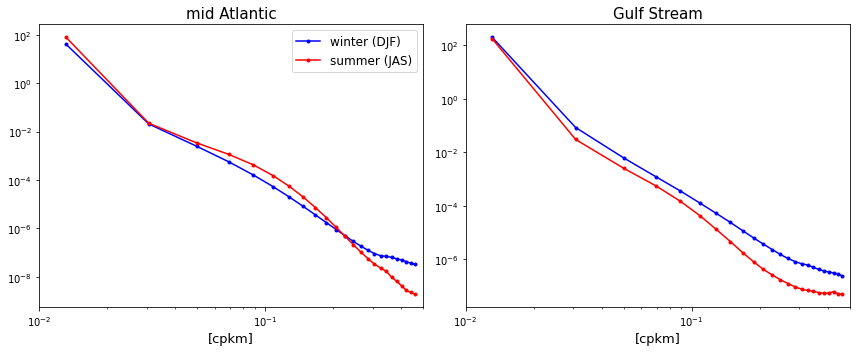

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [15]:
fig, (ax1,ax2) = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
fig.set_tight_layout(True)

ax1.plot(KmidA*1e3, KmidA*isoF_DJFmidAh, 'b.-', label=r'winter (DJF)')
ax1.plot(KmidA*1e3, KmidA*isoF_JASmidAh, 'r.-', label=r'summer (JAS)')
ax2.plot(KGS*1e3, KGS*isoF_DJFGSh, 'b.-', label=r'winter')
ax2.plot(KGS*1e3, KGS*isoF_JASGSh, 'r.-', label=r'summer')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1e-2,5e-1])
ax1.set_xlabel(r"[cpkm]", fontsize=13)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-2,5e-1])
ax2.set_xlabel(r"[cpkm]", fontsize=13)

ax1.legend(loc='upper right', fontsize=12)

ax1.set_title(r"mid Atlantic", fontsize=15)
ax2.set_title(r"Gulf Stream", fontsize=15)